In [37]:
import pandas as pd
star_wars = pd.read_csv("starwars/starwars.csv", encoding="ISO-8859-1")

Remove rows where "RespondentID" is not a number

In [38]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

Convert Yes/No columns to boolean: 
* `Have you seen any of the 6 films in the Star Wars franchise?` 
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

In [39]:
yes_no = {"Yes": True, "No": False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

Convert "Have you seen movie..." columns to True/False

In [40]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

Rename columns for seen episodes

In [41]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
})

Clean Up Movie Ranking Columns

In [42]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

Rename ranking columns

In [43]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
})

## The Highest Ranked Movie

<Container object of 6 artists>

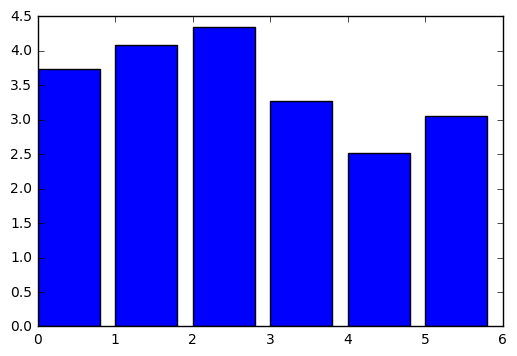

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

Lower values of bars are better ranking episodes.  
So the 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most favourite.

## The Most Seen Movie

<Container object of 6 artists>

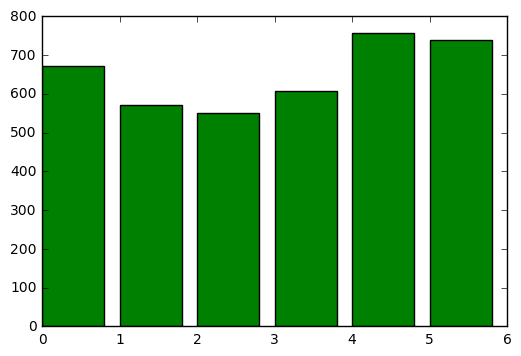

In [45]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum(), color='green')

Higher values of bars are most viewed episodes.
So the 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most viewed.  
It is strong correlation with most favourite movie.

# Gender Segments

In [46]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

## The Highest Ranked Movie by Males and Females

In [47]:
# Get some common plot configuration
episodes = ('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI')
width = 0.35
def cute_labels(ax):
    ax.set_xticks(np.arange(6) + width)
    ax.set_xticklabels(episodes)
    for label in ax.xaxis.get_ticklabels():
        label.set_color('Maroon')
        label.set_rotation(25)
        label.set_fontsize(10)
    for line in ax.yaxis.get_ticklines():    
        line.set_markersize(3)
        line.set_markeredgewidth(1)

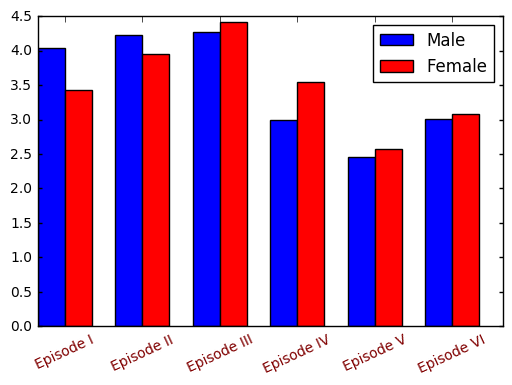

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), males[males.columns[9:15]].mean(), width,  color = 'blue')
rects2 = ax.bar(np.arange(6) + width, females[females.columns[9:15]].mean(), width, color = 'red')
cute_labels(ax)    

plt.legend((rects1[0], rects2[0]), ('Male', 'Female'), loc='upper right')
plt.show()

Lower values of bars are better ranking episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most favourite for both male and female groups.

## The Most Seen Movie by Males and Females

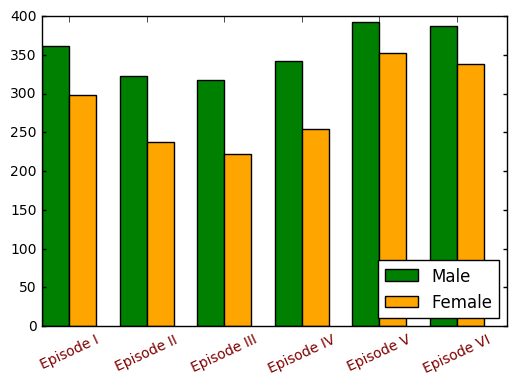

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), males[males.columns[3:9]].sum(), width,  color = 'green')
rects2 = ax.bar(np.arange(6) + width, females[females.columns[3:9]].sum(), width, color = 'orange')
cute_labels(ax)
plt.legend((rects1[0], rects2[0]), ('Male', 'Female'), loc='lower right')
plt.show()

Higher values of bars are most viewed episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most viewed by males and females.  
**Interesting thing:** Episodes I, II, III, IV are lower ranked by male, but it had seen almost same frequent like more higher ranked Episodes V, VI

# Star Wars Fan Segments

In [50]:
fld="Do you consider yourself to be a fan of the Star Wars film franchise?"
fan    = star_wars[star_wars[fld] == True]
notfan = star_wars[star_wars[fld] == False]

## The Highest Ranked Movie by Fans and not Fans

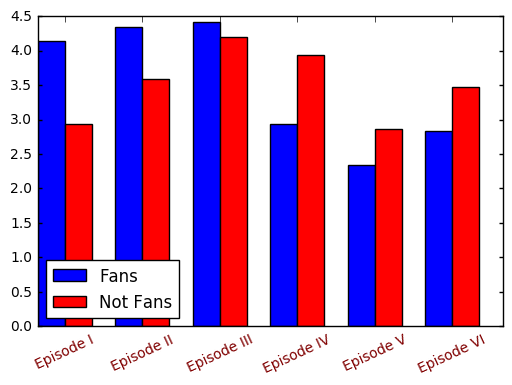

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), fan[fan.columns[9:15]].mean(), width,  color = 'blue')
rects2 = ax.bar(np.arange(6) + width, notfan[notfan.columns[9:15]].mean(), width, color = 'red')
cute_labels(ax)    

plt.legend((rects1[0], rects2[0]), ('Fans', 'Not Fans'), loc='lower left')
plt.show()

Lower values of bars are better ranking episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most favourite for both fan and not fan groups.

## The Most Seen Movie by Fans and not Fans

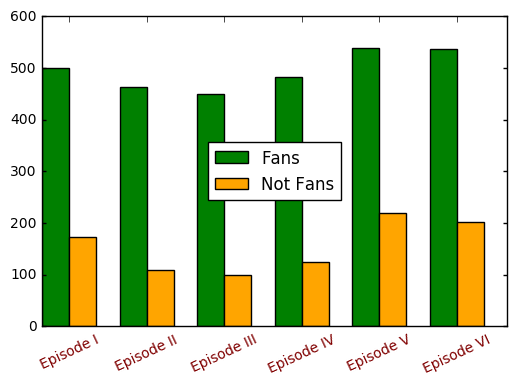

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), fan[fan.columns[3:9]].sum(), width,  color = 'green')
rects2 = ax.bar(np.arange(6) + width, notfan[notfan.columns[3:9]].sum(), width, color = 'orange')
cute_labels(ax)
plt.legend((rects1[0], rects2[0]), ('Fans', 'Not Fans'), loc='center')
plt.show()

Higher values of bars are most viewed episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most viewed by fans and not fans.  
**Interesting thing:** Episodes I, II, III, IV are lower ranked by fan, but it had seen almost same frequent like more higher ranked Episodes V, VI

# Star Treck Fan Segments

In [53]:
fld = "Do you consider yourself to be a fan of the Star Trek franchise?"
st_fan    = star_wars[star_wars[fld] == "Yes"]
st_notfan = star_wars[star_wars[fld] == "No"]

## The Highest Ranked Movie by Start Treck Fans and not Fans

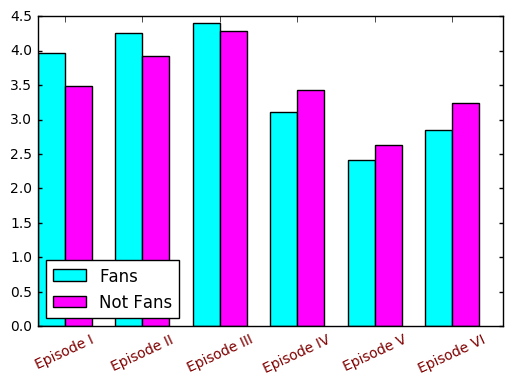

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), st_fan[st_fan.columns[9:15]].mean(), width,  color = 'cyan')
rects2 = ax.bar(np.arange(6) + width, st_notfan[st_notfan.columns[9:15]].mean(), width, color = 'magenta')
cute_labels(ax)    

plt.legend((rects1[0], rects2[0]), ('Fans', 'Not Fans'), loc='lower left')
plt.show()

Lower values of bars are better ranking episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most favourite for both Star Treck fan and not fan groups.

## The Most Seen Movie by Start Treck Fans and not Fans

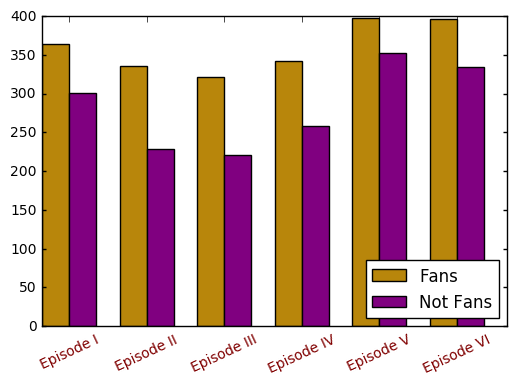

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), st_fan[st_fan.columns[3:9]].sum(), width,  color = 'darkgoldenrod')
rects2 = ax.bar(np.arange(6) + width, st_notfan[st_notfan.columns[3:9]].sum(), width, color = 'purple')
cute_labels(ax)
plt.legend((rects1[0], rects2[0]), ('Fans', 'Not Fans'), loc='lower right')
plt.show()

Higher values of bars are most viewed episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most viewed by Star Treck fans and not fans.  
**Interesting thing:** Episodes I, II, III, IV are lower ranked by fan, but it had seen almost same frequent like more higher ranked Episodes V, VI